In [1]:
# Exploring Visualizations with Pumpkin Data
# Import necessary libraries for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the pumpkin dataset
df = pd.read_csv('US-pumpkins.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1757, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     16

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
# Data cleaning and preparation
print("Missing values per column:")
print(df.isnull().sum())

# Check for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns: {list(numeric_columns)}")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create average price column
df['Average_Price'] = (df['Low Price'] + df['High Price']) / 2

# Check unique values in key categorical columns
print(f"\nUnique cities: {df['City Name'].nunique()}")
print(f"Unique varieties: {df['Variety'].nunique()}")
print(f"Unique item sizes: {df['Item Size'].nunique()}")
print(f"Unique package types: {df['Package'].nunique()}")

print("\nDataset cleaned and prepared!")

Missing values per column:
City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

Numeric columns: ['Grade', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High', 'Environment', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Trans Mode', 'Unnamed: 24']

Unique cities: 13
Unique varieties: 10
Unique item sizes: 7
Unique package types: 15

Dataset cleaned and prepared!


C:\Users\Dell\AppData\Local\Temp\ipykernel_8248\1256569797.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


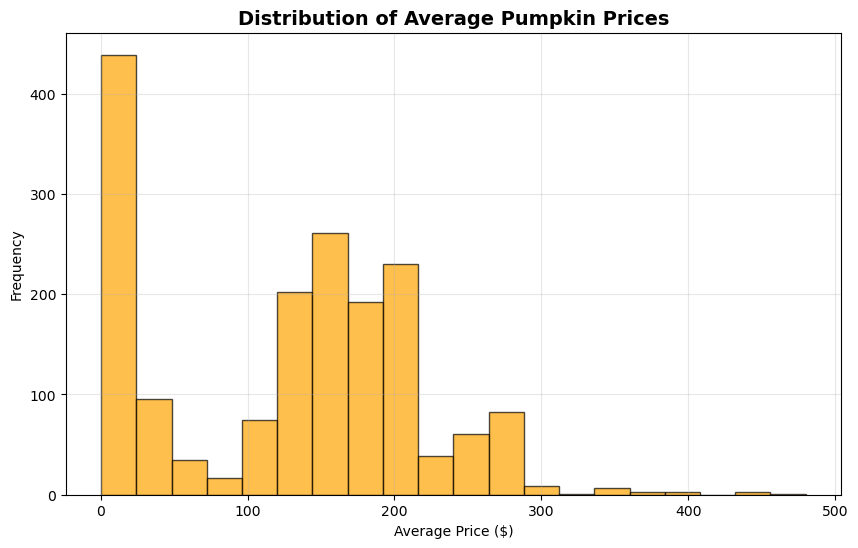

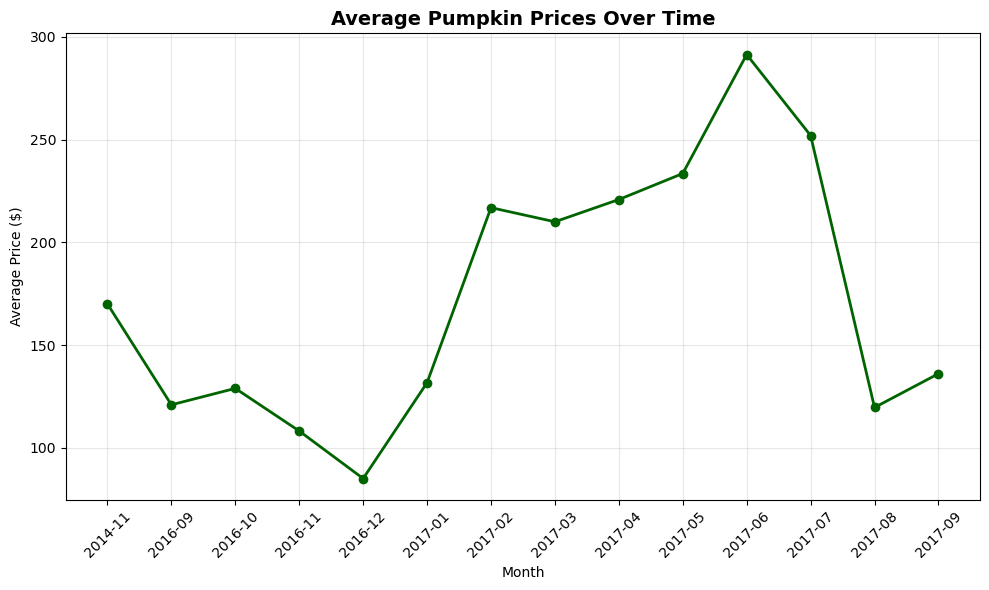

Simple matplotlib visualizations completed!


In [8]:
# Simple Visualization 1: Price Distribution using Matplotlib

# 1. Simple histogram of average prices
plt.figure(figsize=(10, 6))
plt.hist(df['Average_Price'].dropna(), bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Average Pumpkin Prices', fontsize=14, fontweight='bold')
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Simple line plot of prices over time
plt.figure(figsize=(10, 6))
monthly_prices = df.groupby(df['Date'].dt.to_period('M'))['Average_Price'].mean()
plt.plot(monthly_prices.index.astype(str), monthly_prices.values, marker='o', color='darkgreen', linewidth=2)
plt.title('Average Pumpkin Prices Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Simple matplotlib visualizations completed!")

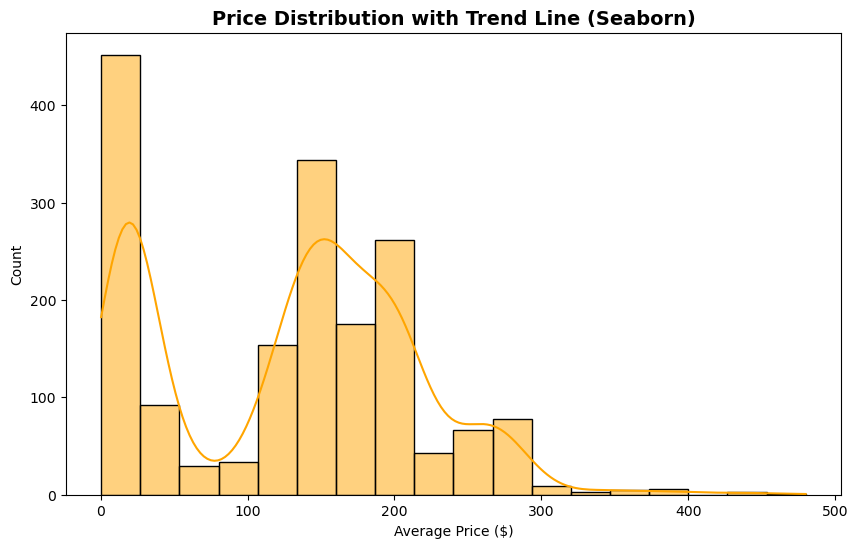

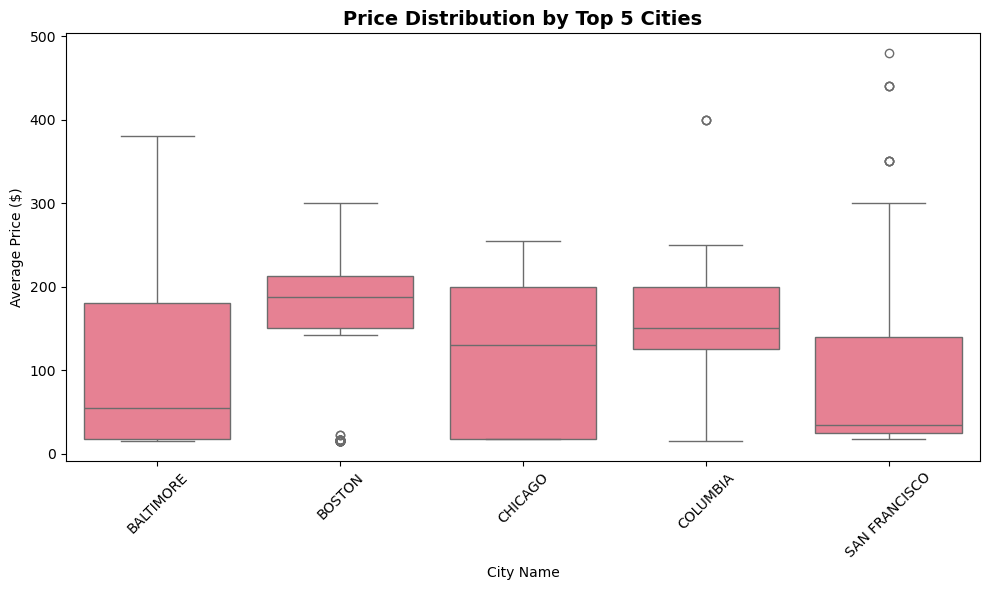

Simple seaborn visualizations completed!


In [9]:
# Simple Visualization 2: Using Seaborn for Statistical Plots

# 1. Simple distribution plot with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Average_Price', kde=True, color='orange')
plt.title('Price Distribution with Trend Line (Seaborn)', fontsize=14, fontweight='bold')
plt.xlabel('Average Price ($)')
plt.show()

# 2. Box plot of prices by top 5 cities
plt.figure(figsize=(10, 6))
top_cities = df['City Name'].value_counts().head(5).index
df_top_cities = df[df['City Name'].isin(top_cities)]
sns.boxplot(data=df_top_cities, x='City Name', y='Average_Price')
plt.title('Price Distribution by Top 5 Cities', fontsize=14, fontweight='bold')
plt.xlabel('City Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Simple seaborn visualizations completed!")

In [10]:
# Simple Analysis: Matplotlib vs Seaborn

print("=== MATPLOTLIB vs SEABORN: SIMPLE COMPARISON ===\n")

print("MATPLOTLIB:")
print("• More control over plot details")
print("• Need to write more code")
print("• Good for custom visualizations")

print("\nSEABORN:")
print("• Easier to create beautiful plots")
print("• Less code needed")
print("• Great for statistical visualizations")
print("• Better default colors and styles")

print("\nWHICH IS EASIER?")
print("Seaborn is generally easier for beginners because:")
print("• It creates nice-looking plots with less code")
print("• It works well with pandas DataFrames")
print("• It has built-in statistical functions")

print("\nSIMPLE INSIGHTS FROM OUR DATA:")
print("• Pumpkin prices vary by location and time")
print("• Some cities have higher average prices")
print("• Prices change throughout the year")

=== MATPLOTLIB vs SEABORN: SIMPLE COMPARISON ===

MATPLOTLIB:
• More control over plot details
• Need to write more code
• Good for custom visualizations

SEABORN:
• Easier to create beautiful plots
• Less code needed
• Great for statistical visualizations
• Better default colors and styles

WHICH IS EASIER?
Seaborn is generally easier for beginners because:
• It creates nice-looking plots with less code
• It works well with pandas DataFrames
• It has built-in statistical functions

SIMPLE INSIGHTS FROM OUR DATA:
• Pumpkin prices vary by location and time
• Some cities have higher average prices
• Prices change throughout the year


=== PUMPKIN DATA SUMMARY ===
Total records: 1,757
Average price: $128.77
Highest price: $480.00
Lowest price: $0.24


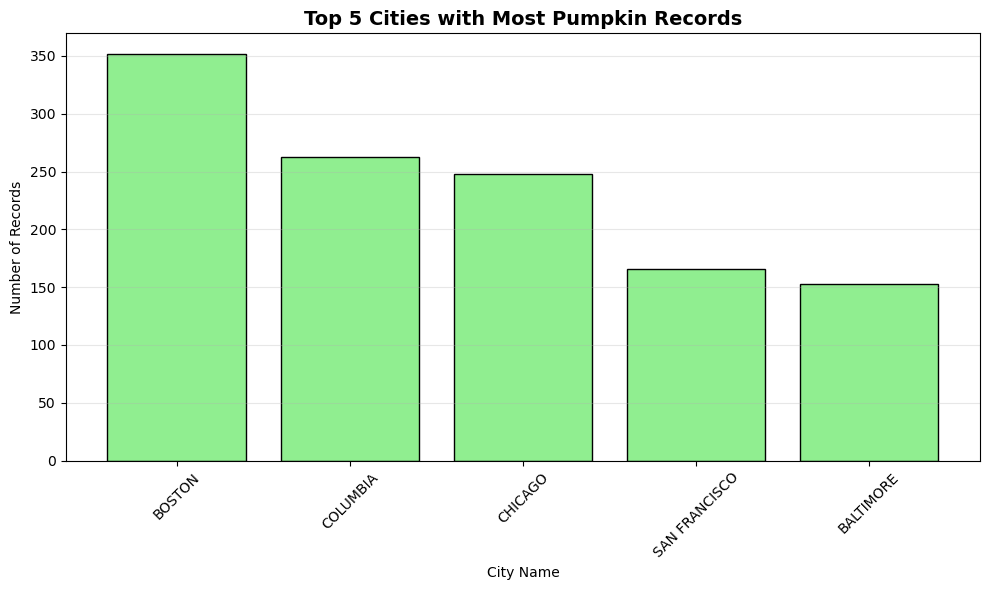


=== ANALYSIS COMPLETE ===
We created simple visualizations using both matplotlib and seaborn.
Both libraries are useful for different types of data visualization!


In [11]:
# Simple Data Summary

print("=== PUMPKIN DATA SUMMARY ===")
print(f"Total records: {len(df):,}")
print(f"Average price: ${df['Average_Price'].mean():.2f}")
print(f"Highest price: ${df['Average_Price'].max():.2f}")
print(f"Lowest price: ${df['Average_Price'].min():.2f}")

# Simple bar chart of top 5 cities
plt.figure(figsize=(10, 6))
city_counts = df['City Name'].value_counts().head(5)
plt.bar(city_counts.index, city_counts.values, color='lightgreen', edgecolor='black')
plt.title('Top 5 Cities with Most Pumpkin Records', fontsize=14, fontweight='bold')
plt.xlabel('City Name')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== ANALYSIS COMPLETE ===")
print("We created simple visualizations using both matplotlib and seaborn.")
print("Both libraries are useful for different types of data visualization!")